# Export la muerte

In [1]:
import pandas as pd

In [75]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/openZH/covid_19/master/fallzahlen_kanton_zh/COVID19_Fallzahlen_Kanton_ZH_total.csv')

In [82]:
df = df_raw.copy()
df['ncumul_deceased'] = df['ncumul_deceased'].fillna(0)
#df = df.head(20)
df['date'] = pd.to_datetime(df['date'])
df['death'] = df['ncumul_deceased'].diff()

# Remove before 2020-03-15
df = df[df.date >= '2020-03-15']

# Create Day
df = df.reset_index(drop=True)
df = df.reset_index(drop=False)
df.rename(columns={'index': 'day'}, inplace=True)

# TEMP!
#df = df.head(20)


df = df[['day', 'date', 'death']]

In [83]:
df.to_json('../src/components/stage/data.json', orient='records')
#df.to_json('..\\src\\components\\stage\\data.json', orient='records')

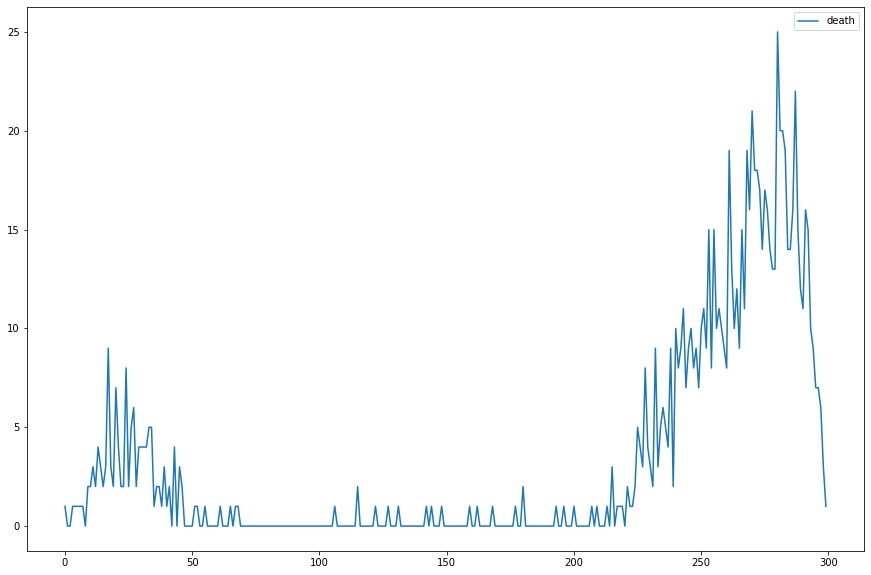

In [4]:
df[['death']].plot.line(figsize=(15, 10))

In [81]:
df[df.date == '2021-01-08']

,day,date,death
299,299,2021-01-08,1.0


In [78]:
df.tail()

,day,date,death
295,295,2021-01-04,7.0
296,296,2021-01-05,7.0
297,297,2021-01-06,6.0
298,298,2021-01-07,3.0
299,299,2021-01-08,1.0


<AxesSubplot:>

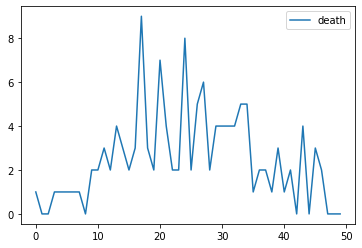

In [46]:
df.head(50)[['death']].plot.line()

In [47]:
df.head(50)['death'].max()

9.0

<AxesSubplot:>

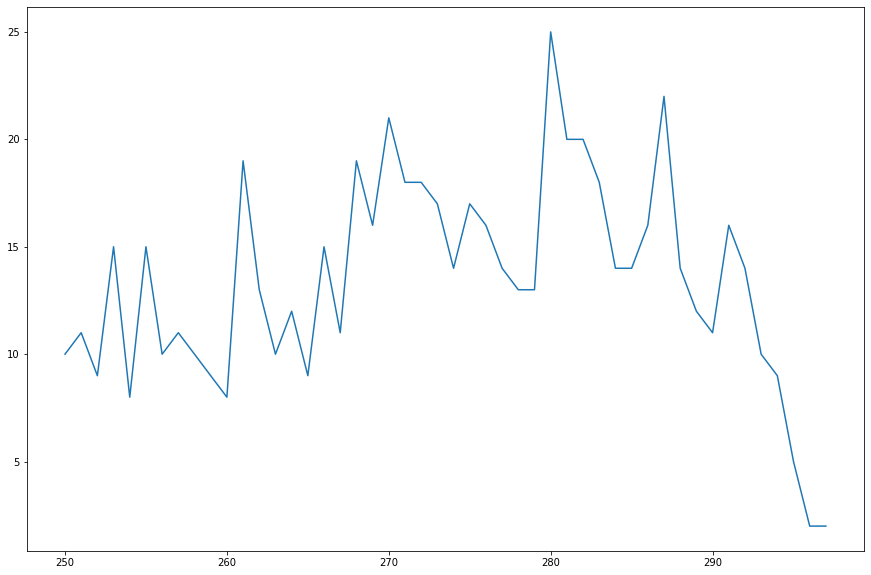

In [48]:
df2 = df[df.day >= 250]
df2['death'].plot.line(figsize=(15, 10))

In [49]:
df2.head(80)

,day,date,death
250,250,2020-11-20,10.0
251,251,2020-11-21,11.0
252,252,2020-11-22,9.0
253,253,2020-11-23,15.0
254,254,2020-11-24,8.0
255,255,2020-11-25,15.0
256,256,2020-11-26,10.0
257,257,2020-11-27,11.0
258,258,2020-11-28,10.0
259,259,2020-11-29,9.0


In [50]:
df['death'].sum()

971.0

In [56]:
df.tail()

,day,date,death
293,293,2021-01-02,10.0
294,294,2021-01-03,9.0
295,295,2021-01-04,5.0
296,296,2021-01-05,2.0
297,297,2021-01-06,2.0


## Übersterblichkeit

In [64]:
pd.read_csv('ts-d-14.03.04.06-wr.csv', sep=';', encoding='utf-8').tail(20)

,Kanton,Woche,endend,Alter,untGrenze,Erwartung,obeGrenze,AnzTF_HR,Exzess
1900,ZH,46.0,15.11.2020,65+,153.0,189.0,224.0,238,238
1901,ZH,47.0,22.11.2020,65+,155.0,190.0,226.0,262,262
1902,ZH,48.0,29.11.2020,65+,156.0,191.0,227.0,267.1,267.1
1903,ZH,49.0,06.12.2020,65+,157.0,192.0,228.0,285.2,285.2
1904,ZH,50.0,13.12.2020,65+,158.0,194.0,229.0,368.3,368.3
1905,ZH,51.0,20.12.2020,65+,159.0,195.0,231.0,332.5,332.5
1906,ZH,52.0,27.12.2020,65+,160.0,196.0,232.0,291.8,291.8
1907,ZH,53.0,03.01.2021,65+,161.0,197.0,233.0,.,.
1908,#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1909,# Kanton: Wohnkanton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df_u = pd.read_csv('ts-d-14.03.04.06-wr.csv', sep=';', encoding='utf-8')
df_u = df_u.replace(" ", "", regex=True)
df_u = df_u[df_u.Kanton == 'ZH']
df_u = df_u[df_u.Alter == '65+']
df_u = df_u[df_u.AnzTF_HR != '.']
df_u['AnzTF_HR'] = pd.to_numeric(df_u['AnzTF_HR'])
#df_u = df_u.groupby('Woche').agg({'obeGrenze': 'sum', 'AnzTF_HR': 'sum'})
df_u = df_u[['Woche', 'obeGrenze', 'AnzTF_HR']]
df_u['over'] = df_u.AnzTF_HR > df_u.obeGrenze
df_u['diff'] = df_u.AnzTF_HR - df_u.obeGrenze

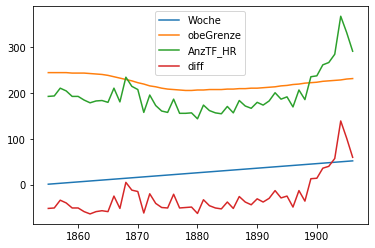

In [71]:
df_u.plot.line()

In [72]:
df_u[df_u.over == True]

,Woche,obeGrenze,AnzTF_HR,over,diff
1868,14.0,230.0,235.0,True,5.0
1899,45.0,223.0,236.0,True,13.0
1900,46.0,224.0,238.0,True,14.0
1901,47.0,226.0,262.0,True,36.0
1902,48.0,227.0,267.1,True,40.1
1903,49.0,228.0,285.2,True,57.2
1904,50.0,229.0,368.3,True,139.3
1905,51.0,231.0,332.5,True,101.5
1906,52.0,232.0,291.8,True,59.8
